# Us Insurance Project: Medical Cost Analysis
*By [Sergio Avalos S.](https://github.com/srg2912)*

In this project the [Medical Cost Personal Dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=download) will be set for analysis using Python Pandas, NumP0y, SciPy, Matplotlib and Seaborn.

### Importing the Libraries

First we'll be importing the necessary libraries for the analysis.

In [78]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

We'll import our dataset with the name of dataframe, also, we will be using the method .head() to analyse the first 5 rows:

In [79]:
dataframe = pd.read_csv('insurance.csv')
print(dataframe.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


### 1. Summary Satistics

We'll be using the method describe to display so,e of the more common summary statistics. Then, we'll be calculating the mean, median, mode, standard deviation, range and variance for our numerical features in order to have a better understanging on each individual feature. 

In [80]:
print(dataframe.describe(include='all'))

                age   sex          bmi     children smoker     region  \
count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   676          NaN          NaN   1064        364   
mean      39.207025   NaN    30.663397     1.094918    NaN        NaN   
std       14.049960   NaN     6.098187     1.205493    NaN        NaN   
min       18.000000   NaN    15.960000     0.000000    NaN        NaN   
25%       27.000000   NaN    26.296250     0.000000    NaN        NaN   
50%       39.000000   NaN    30.400000     1.000000    NaN        NaN   
75%       51.000000   NaN    34.693750     2.000000    NaN        NaN   
max       64.000000   NaN    53.130000     5.000000    NaN        NaN   

             charges  
count    1338.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean    

In [81]:
num_var = {'Age': dataframe.age, 'BMI':dataframe.bmi, 'Children':dataframe.children, 'Charges':dataframe.charges}

for i,j in num_var.items():
    print(f'Summary Statistics for {i}:')
    print('Mean: ' + str(round(j.mean(), 2)))
    print('Median: ' + str(round(j.median(), 2)))
    print('Mode: ' + str(round(j.mode()[0], 2)))
    print('Std Dev: ' + str(round(j.std(), 2)))
    print('Range: ' + str(round(j.max() - j.min(), 2)))
    print('Variance: ' + str(round(j.var(), 2)))
    print('\n')

Summary Statistics for Age:
Mean: 39.21
Median: 39.0
Mode: 18
Std Dev: 14.05
Range: 46
Variance: 197.4


Summary Statistics for BMI:
Mean: 30.66
Median: 30.4
Mode: 32.3
Std Dev: 6.1
Range: 37.17
Variance: 37.19


Summary Statistics for Children:
Mean: 1.09
Median: 1.0
Mode: 0
Std Dev: 1.21
Range: 5
Variance: 1.45


Summary Statistics for Charges:
Mean: 13270.42
Median: 9382.03
Mode: 1639.56
Std Dev: 12110.01
Range: 62648.55
Variance: 146652372.15




From this first analysis we can observe a very high variance and huge standard deviation in the "charges" feature, that suggest a few extreme cases driving up the average. Also, the median (9,382.03) is much lower than the mean (13,270.42), which is another sign of right-skewed data with outliers.

### 2. Feature Visualization

In this section we'll be creating boxplots and histograms for better visualization on our numerical variables.

In [82]:
dataframe_numvar = dataframe[['age', 'bmi', 'children', 'charges']]

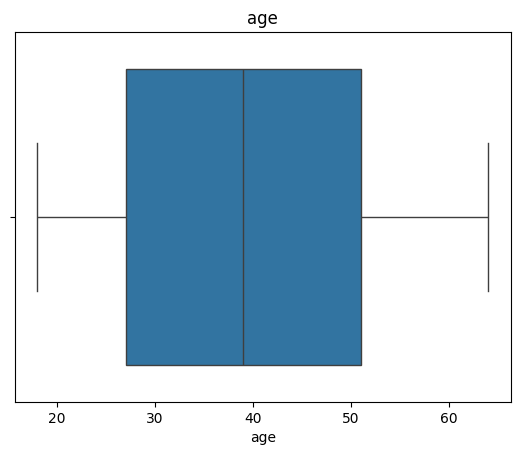

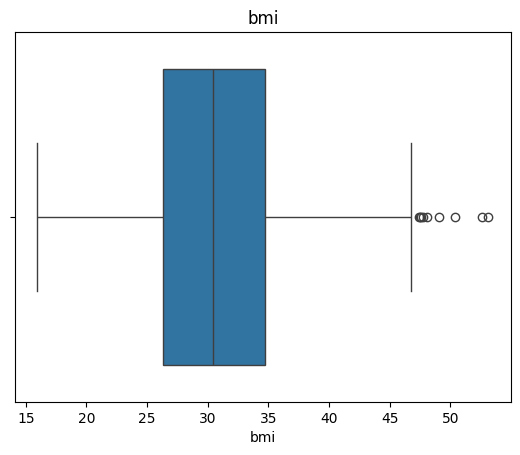

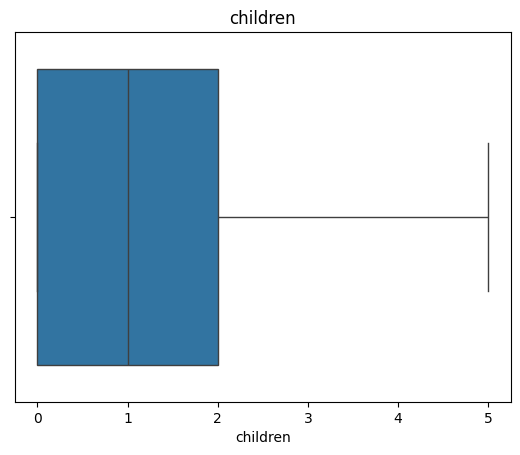

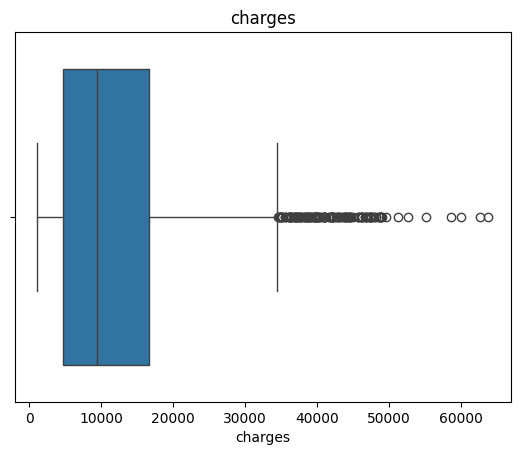

In [83]:
#Boxplots for evrery numerical feature
for i in dataframe_numvar:
    sns.boxplot(data = dataframe_numvar, x = i)
    plt.title(i)
    plt.show()
    plt.close()

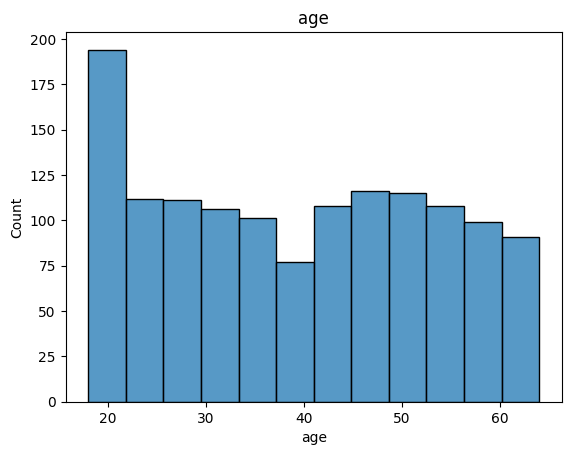

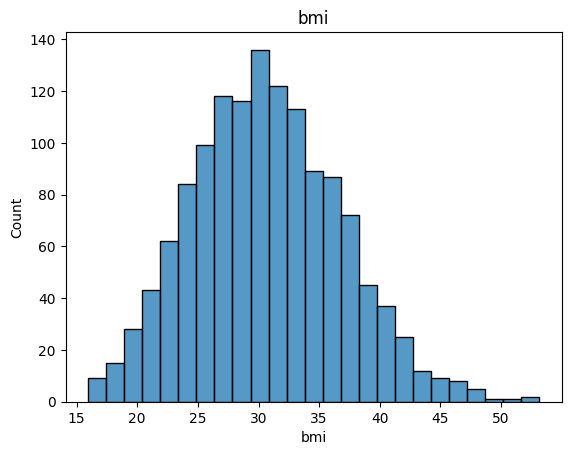

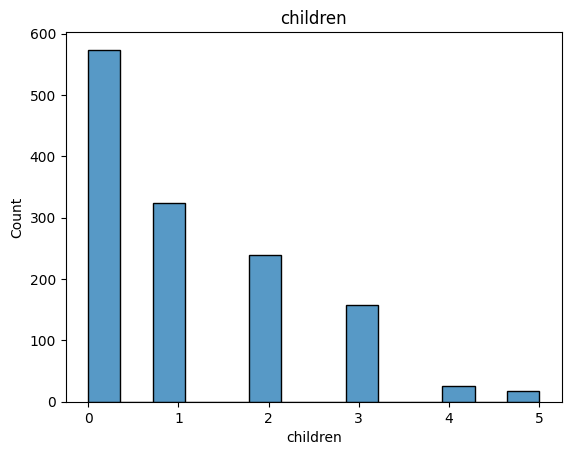

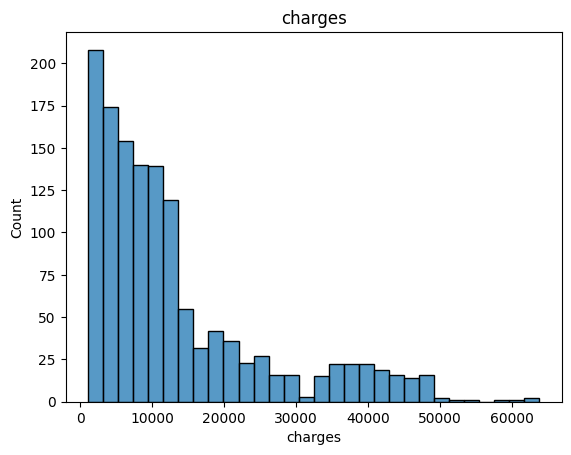

In [84]:
#Histograms for every numerical feature
for i in dataframe_numvar:
    sns.histplot(data = dataframe_numvar, x = i)
    plt.title(i)
    plt.show()
    plt.close()

This visualizations allows us to clearly see the skewness to the right of the "charges" feature, it also allows us to see that the "bmi" feature presents some skewness to the right as well. We'll be visualizing the quantitative features now.

In [85]:
dataframe_catvar = dataframe[['sex', 'smoker', 'region']]

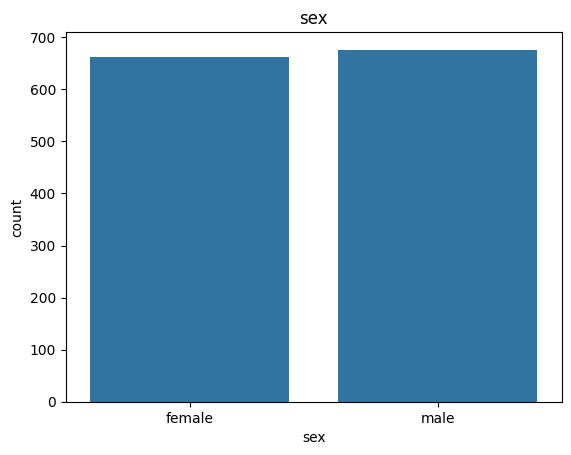

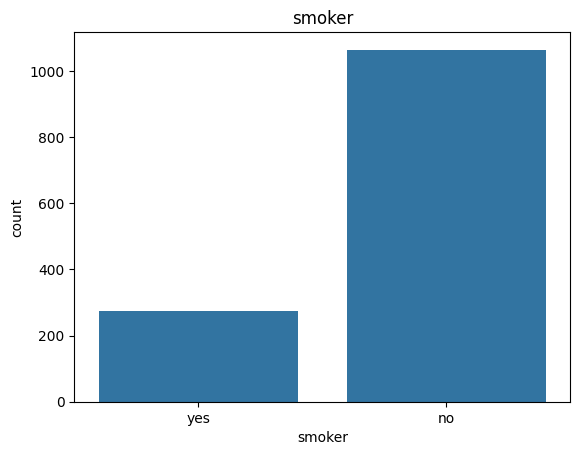

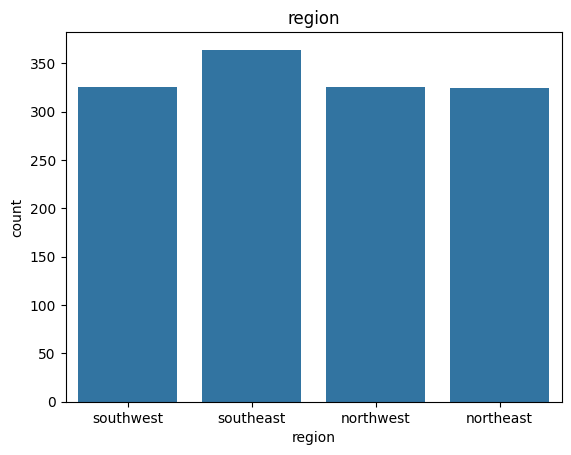

In [86]:
#countplots for evrery categorical feature
for i in dataframe_catvar:
    sns.countplot(data = dataframe_catvar, x = i)
    plt.title(i)
    plt.show()
    plt.close()

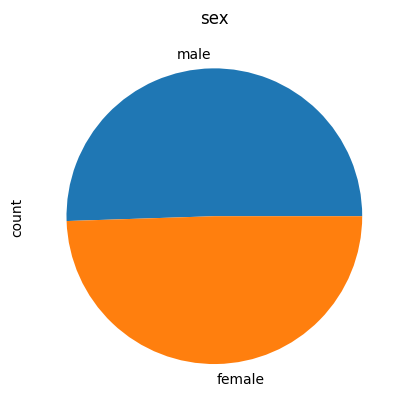

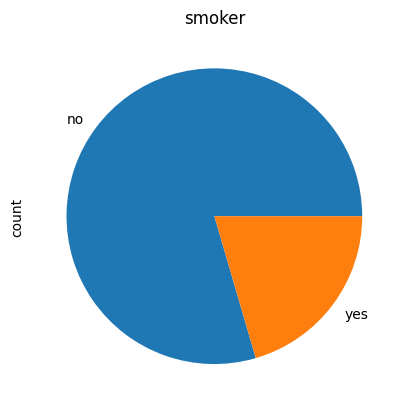

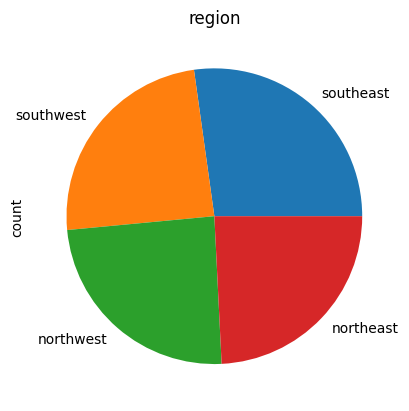

In [87]:
#pie charts for evrery categorical feature
for i in dataframe_catvar:
    dataframe_catvar[i].value_counts().plot.pie()
    plt.title(i)
    plt.show()
    plt.close()

From this visualiztion we can observe that most of our categorical features are equally divided, except for the feature "smoker" where we can clearly observe that there's a majority of non-smokers in our data.

### 3. Impact of Smoking on Charges

In this section we'll be comparing the categorical variable of "smoking" against the numerical variable of "charges", in order to prove the possible correlation between the variables. First we'll saving the charges for smokers and non smokers in 2 separate lists:

In [88]:
charges_smoker = dataframe.charges[dataframe.smoker == 'yes']
charges_nonsmoker = dataframe.charges[dataframe.smoker == 'no']

Now, we'll calculate the mean and median difference:

In [89]:
#Mean difference
mean_smoker = round(np.mean(charges_smoker), 2)
mean_nonsmoker = round(np.mean(charges_nonsmoker), 2)
mean_diff_smoker = round(abs(mean_nonsmoker - mean_smoker), 2)
print(f'The average charge for a smoker is: {mean_smoker} USD')
print(f'The average charge for a non-smoker is: {mean_nonsmoker} USD')
print(f'The difference between both means is: {mean_diff_smoker} USD')

The average charge for a smoker is: 32050.23 USD
The average charge for a non-smoker is: 8434.27 USD
The difference between both means is: 23615.96 USD


In [90]:
#Median difference
median_smoker = round(np.median(charges_smoker), 2)
median_nonsmoker = round(np.median(charges_nonsmoker), 2)
median_diff_smoker = round(abs(median_nonsmoker - median_smoker), 2)
print(f'The median charge for a smoker is: {median_smoker} USD')
print(f'The median charge for a non-smoker is: {median_nonsmoker} USD')
print(f'The difference between both medians is: {median_diff_smoker} USD')

The median charge for a smoker is: 34456.35 USD
The median charge for a non-smoker is: 7345.41 USD
The difference between both medians is: 27110.94 USD


We can observe that there's a big difference between the means and the medians for smokers and non-smokers, to prove the correlation further we can compare the features by visualzing them as well:

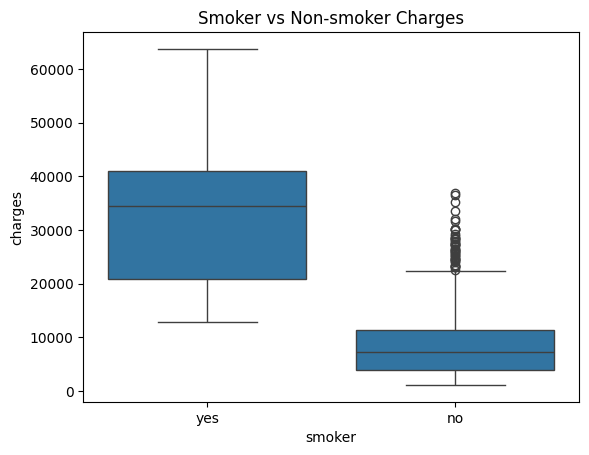

In [91]:
#Box plot comparison
sns.boxplot(data = dataframe, x = 'smoker', y = 'charges')
plt.title('Smoker vs Non-smoker Charges')
plt.show()
plt.close()

In [ ]:
#Histogram comparison
plt.hist(charges_nonsmoker, color="blue", label="Non-Smoker", density=True, alpha=0.8)  
plt.hist(charges_smoker, color="red", label="Smoker", density=True, alpha=0.8)
plt.legend()
plt.title('Smoker vs Non-smoker Charges')
plt.show()
plt.close()

The box plot shows no overlapping while there's barely any overlapping in the histogram comparison, this proves the correlation between both variables.

### 4. Age vs. Charges

In this section and in the future ones we will be comparing diverse features against the "charges" feature to investigate their impact on the medical insurance cost. In this section we'll be comparing "age" and "charges" specifically. We will start by generating a scatter plot first:

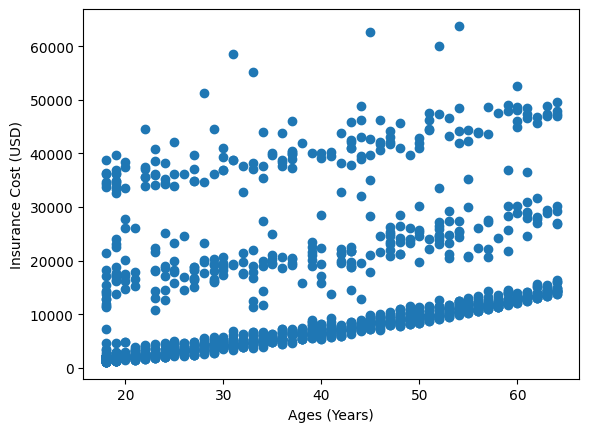

In [ ]:
plt.scatter(x = dataframe.age, y = dataframe.charges)
plt.xlabel('Ages (Years)')
plt.ylabel('Insurance Cost (USD)')
plt.show()
plt.close()

Next, we'll calculate the covariance and the correlation:

In [ ]:
#Covariance
cov_age_charges = np.cov(dataframe.age, dataframe.charges)
print(cov_age_charges)

[[1.97401387e+02 5.08748023e+04]
 [5.08748023e+04 1.46652372e+08]]


In [ ]:
#Peaterson's correlation
corr_age_charges, p = pearsonr(dataframe.age, dataframe.charges)
print(corr_age_charges)

0.2990081933306476


The covariance of 5.09 and the Peaterson's correlation of 0.3 would prove that there's no linear correlation between the variables. However, the scatter plot presents of multiple distinct linear patterns, this suggests that there might be subgroups in the data, probably due to a difference in the insurance costs for smokers and non-smokers or for individuals with different BMI's.

### 5. BMI and Medical Costs

In this section we'll analyze the relationship between the variables "bmi" and "charges". We will start by generating a scatter plot:

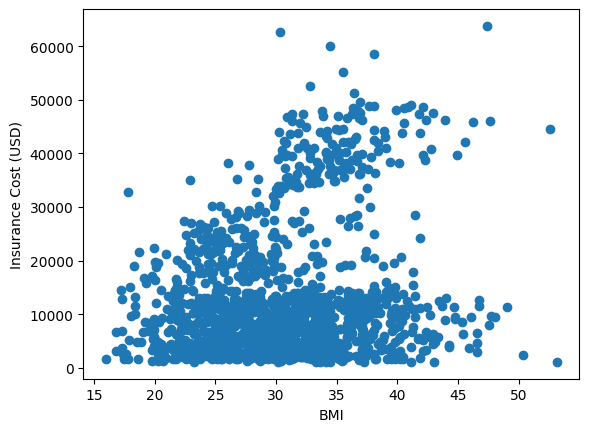

In [ ]:
plt.scatter(x = dataframe.bmi, y = dataframe.charges)
plt.xlabel('BMI')
plt.ylabel('Insurance Cost (USD)')
plt.show()
plt.close()

Next, we'll calculate the covariance and the correlation:

In [ ]:
#Covariance
cov_bmi_charges = np.cov(dataframe.bmi, dataframe.charges)
print(cov_bmi_charges)

[[3.71878836e+01 1.46473044e+04]
 [1.46473044e+04 1.46652372e+08]]


In [ ]:
#Peaterson's correlation
corr_bmi_charges, p = pearsonr(dataframe.bmi, dataframe.charges)
print(corr_bmi_charges)

0.1983409688336289


The set of results we've got (the scater plot, the covariance of 1.46 and the correlation of 0.2) indicate no correlation between both variables.

### 6. Children and Charges

In this section we'll analyze the relationship between the variables "children" and "charges". We'll start by creating our scater plot:

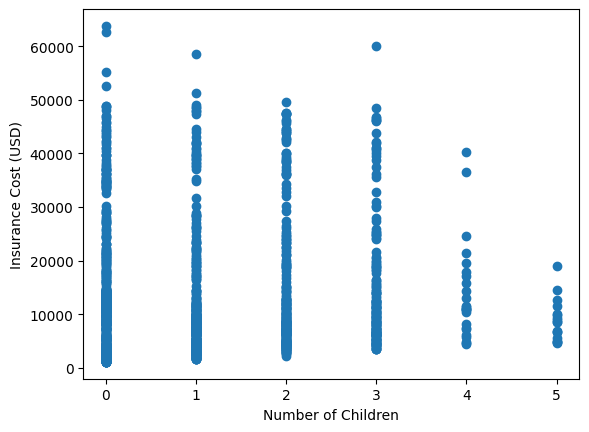

In [ ]:
plt.scatter(x = dataframe.children, y = dataframe.charges)
plt.xlabel('Number of Children')
plt.ylabel('Insurance Cost (USD)')
plt.show()
plt.close()

Next, we'll calculate the covariance and the correlation:

In [ ]:
#Covariance
cov_children_charges = np.cov(dataframe.children, dataframe.charges)
print(cov_children_charges)

[[1.45321275e+00 9.92674197e+02]
 [9.92674197e+02 1.46652372e+08]]


In [ ]:
#Peaterson's correlation
corr_children_charges, p = pearsonr(dataframe.children, dataframe.charges)
print(corr_children_charges)

0.06799822684790482


The set of results we've got (the scater plot, the covariance of 9.92 and the correlation of 0.07) indicate no correlation between both variables.

### 7. Gender and Medical Costs

In this section we'll analyze the relationship between the variables "sex" and "charges", in order to observe if the insurance cost varies according to the sex of the patient. We'll saving the charges for males and females in 2 separate lists:

In [ ]:
charges_male = dataframe.charges[dataframe.sex == 'male']
charges_female = dataframe.charges[dataframe.sex == 'female']

Now, we'll calculate the mean and median difference:

In [ ]:
#Mean difference
mean_male = round(np.mean(charges_male), 2)
mean_female = round(np.mean(charges_female), 2)
mean_sex = round(abs(mean_female - mean_male), 2)
print(f'The average charge for a male is: {mean_male} USD')
print(f'The average charge for a femaleis: {mean_female} USD')
print(f'The difference between both means is: {mean_sex} USD')

In [ ]:
#Median difference
median_male = round(np.median(charges_male), 2)
median_female = round(np.median(charges_female), 2)
median_sex = round(abs(median_female - median_male), 2)
print(f'The median charge for a male is: {median_male} USD')
print(f'The median charge for a female is: {median_female} USD')
print(f'The difference between both medians is: {median_sex} USD')

There's not a big difference between the charges for both genders, we'll also visualize the comparison in a box plot and a histogram:

In [ ]:
#Box plot comparison
sns.boxplot(data = dataframe, x = 'sex', y = 'charges')
plt.title('Male vs Female Charges')
plt.show()
plt.close()

In [ ]:
#Histogram comparison
plt.hist(charges_male, color="blue", label="Male", density=True, alpha=0.8)  
plt.hist(charges_female, color="red", label="Female", density=True, alpha=0.8)
plt.legend()
plt.title('Male vs Female Charges')
plt.show()
plt.close()

The overlapping between the plots proves that the variable "sex" does not influence the variable "charges".

### 8. Regional Differences

In this section we'll be analyzing the correlation between the variable "region" and the varibale "charges" in order to observe if the insurance cost varies according to the region. In order to do this, we'll generate a box plot that compares the cost of insurance between all of the different regions:

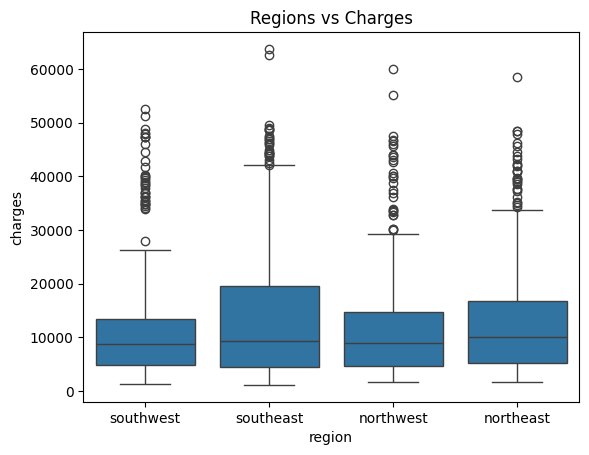

In [92]:
sns.boxplot(data=dataframe, x='region', y='charges')  
plt.title('Regions vs Charges')
plt.show()
plt.close()

From this boxplot we can conclude that there are no significal differences in the insurance cost per region.